In [69]:
import tensorflow as tf
import numpy as np
import progressbar
import matplotlib.pyplot as plt
print(tf.__version__)
import math
import keras
import pandas as pd
import numpy as np
from array import array 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
# df=pd.read_csv("BTC-USD.csv")
# df.tail(5)

2.12.0


In [70]:
import yfinance as yf
stock = yf.Ticker("AAPL")
hist = stock.history(period="5y")
hist.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-26 00:00:00-04:00,173.320007,175.770004,173.110001,175.429993,54835000,0.0,0.0
2023-05-30 00:00:00-04:00,176.960007,178.990005,176.570007,177.300003,55964400,0.0,0.0
2023-05-31 00:00:00-04:00,177.330002,179.350006,176.759995,177.250000,99625300,0.0,0.0
2023-06-01 00:00:00-04:00,177.699997,180.119995,176.929993,180.089996,68901800,0.0,0.0
2023-06-02 00:00:00-04:00,181.029999,181.779999,179.259995,180.949997,61945900,0.0,0.0
2023-06-05 00:00:00-04:00,182.630005,184.949997,178.039993,179.580002,121946500,0.0,0.0
2023-06-06 00:00:00-04:00,179.970001,180.119995,177.429993,179.210007,64848400,0.0,0.0
2023-06-07 00:00:00-04:00,178.440002,181.210007,177.320007,177.820007,61944600,0.0,0.0
2023-06-08 00:00:00-04:00,177.899994,180.839996,177.460007,180.570007,50214900,0.0,0.0


In [71]:
from keras.engine.sequential import training
df=hist
d=30
ahead=10
n=int(hist.shape[0]*0.8)
training_set=df.iloc[:n,1:2].values
test_set=df.iloc[n:,1:2].values

In [72]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(d, n-ahead):
    X_train.append(training_set_scaled[i-d:i, 0])
    y_train.append(training_set_scaled[i+ahead, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [73]:

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
31/31 [==============================] - 8s 12ms/step - loss: 0.0278
Epoch 2/50
31/31 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 3/50
31/31 [==============================] - 0s 10ms/step - loss: 0.0060
Epoch 4/50
31/31 [==============================] - 0s 11ms/step - loss: 0.0067
Epoch 5/50
31/31 [==============================] - 0s 10ms/step - loss: 0.0069
Epoch 6/50
31/31 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 7/50
31/31 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 8/50
31/31 [==============================] - 0s 10ms/step - loss: 0.0054
Epoch 9/50
31/31 [==============================] - 0s 11ms/step - loss: 0.0064
Epoch 10/50
31/31 [==============================] - 0s 10ms/step - loss: 0.0056
Epoch 11/50
31/31 [==============================] - 0s 10ms/step - loss: 0.0049
Epoch 12/50
31/31 [==============================] - 0s 10ms/step - loss: 0.0056
Epoch 13/50
31/31 [==================

In [74]:
model.save("AAPL-predict.h5")

In [75]:
# Getting the predicted stock price

dataset_train = df.iloc[:n, 1:2]
dataset_test = df.iloc[n:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - d:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [76]:
X_test = []
for i in range(d, inputs.shape[0]):
    X_test.append(inputs[i-d:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(252, 30, 1)


In [77]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 1s 5ms/step


In [78]:
df['Date']=df.index

In [79]:
df=df.reset_index(drop=True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,45.717115,45.865243,45.444748,45.688442,73234000,0.0,0.0,2018-06-11 00:00:00-04:00
1,45.726671,46.018152,45.669329,45.939308,67644400,0.0,0.0,2018-06-12 00:00:00-04:00
2,45.972766,46.082670,45.499707,45.561825,86553600,0.0,0.0,2018-06-13 00:00:00-04:00
3,45.764898,45.769677,45.447135,45.585709,86440400,0.0,0.0,2018-06-14 00:00:00-04:00
4,45.401746,45.432806,44.978858,45.117432,246876800,0.0,0.0,2018-06-15 00:00:00-04:00
...,...,...,...,...,...,...,...,...
1254,182.630005,184.949997,178.039993,179.580002,121946500,0.0,0.0,2023-06-05 00:00:00-04:00
1255,179.970001,180.119995,177.429993,179.210007,64848400,0.0,0.0,2023-06-06 00:00:00-04:00
1256,178.440002,181.210007,177.320007,177.820007,61944600,0.0,0.0,2023-06-07 00:00:00-04:00
1257,177.899994,180.839996,177.460007,180.570007,50214900,0.0,0.0,2023-06-08 00:00:00-04:00


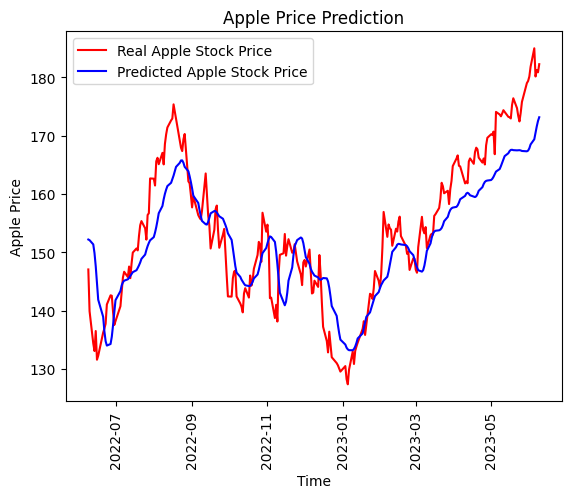

In [80]:
plt.plot(df.loc[n:, 'Date'],dataset_test.values, color = 'red', label = 'Real Apple Stock Price')
plt.plot(df.loc[n:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')

plt.title('Apple Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Price')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [81]:
#Get tomorrow's predicted price

In [82]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,45.717115,45.865243,45.444748,45.688442,73234000,0.0,0.0,2018-06-11 00:00:00-04:00
1,45.726671,46.018152,45.669329,45.939308,67644400,0.0,0.0,2018-06-12 00:00:00-04:00
2,45.972766,46.082670,45.499707,45.561825,86553600,0.0,0.0,2018-06-13 00:00:00-04:00
3,45.764898,45.769677,45.447135,45.585709,86440400,0.0,0.0,2018-06-14 00:00:00-04:00
4,45.401746,45.432806,44.978858,45.117432,246876800,0.0,0.0,2018-06-15 00:00:00-04:00
...,...,...,...,...,...,...,...,...
1254,182.630005,184.949997,178.039993,179.580002,121946500,0.0,0.0,2023-06-05 00:00:00-04:00
1255,179.970001,180.119995,177.429993,179.210007,64848400,0.0,0.0,2023-06-06 00:00:00-04:00
1256,178.440002,181.210007,177.320007,177.820007,61944600,0.0,0.0,2023-06-07 00:00:00-04:00
1257,177.899994,180.839996,177.460007,180.570007,50214900,0.0,0.0,2023-06-08 00:00:00-04:00


In [83]:
## Add a dummy row at the end. This will not be used to predict. 

df.loc[len(df)]=df.loc[len(df)-1]

In [84]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,45.717115,45.865243,45.444748,45.688442,73234000,0.0,0.0,2018-06-11 00:00:00-04:00
1,45.726671,46.018152,45.669329,45.939308,67644400,0.0,0.0,2018-06-12 00:00:00-04:00
2,45.972766,46.082670,45.499707,45.561825,86553600,0.0,0.0,2018-06-13 00:00:00-04:00
3,45.764898,45.769677,45.447135,45.585709,86440400,0.0,0.0,2018-06-14 00:00:00-04:00
4,45.401746,45.432806,44.978858,45.117432,246876800,0.0,0.0,2018-06-15 00:00:00-04:00
...,...,...,...,...,...,...,...,...
1255,179.970001,180.119995,177.429993,179.210007,64848400,0.0,0.0,2023-06-06 00:00:00-04:00
1256,178.440002,181.210007,177.320007,177.820007,61944600,0.0,0.0,2023-06-07 00:00:00-04:00
1257,177.899994,180.839996,177.460007,180.570007,50214900,0.0,0.0,2023-06-08 00:00:00-04:00
1258,181.500000,182.229996,180.630005,180.960007,48870700,0.0,0.0,2023-06-09 00:00:00-04:00


In [85]:
# Getting the predicted stock price

dataset_train = df.iloc[:n, 1:2]
dataset_test = df.iloc[n:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - d:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [86]:
X_test = []
for i in range(d, inputs.shape[0]):
    X_test.append(inputs[i-d:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(253, 30, 1)


In [87]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 0s 5ms/step


In [88]:

float(predicted_stock_price[-1])

173.5006103515625

In [89]:
print("Tomorrow's predicted price = $", float(predicted_stock_price[-1]))

Tomorrow's predicted price = $ 173.5006103515625
